<a href="https://colab.research.google.com/github/kssv23/Machine-Learning/blob/main/Assign_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

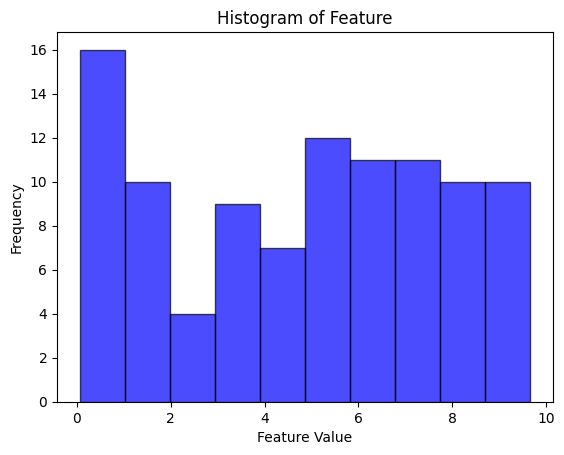

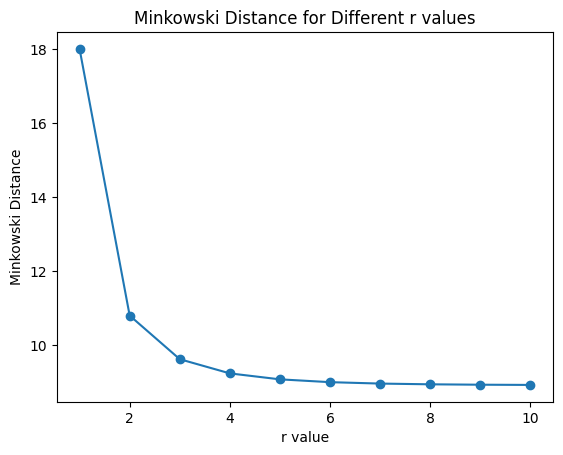

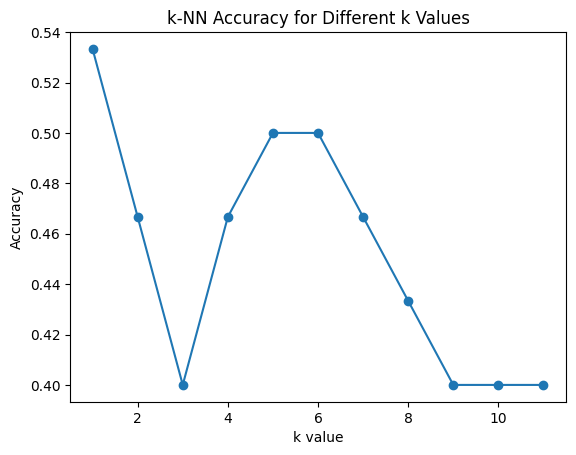

Confusion Matrix:
 [[11  3]
 [15  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.79      0.55        14
           1       0.25      0.06      0.10        16

    accuracy                           0.40        30
   macro avg       0.34      0.42      0.33        30
weighted avg       0.33      0.40      0.31        30



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
df = pd.read_excel("/content/ML-3 dataset.xlsx")  # Load the dataset
X = df.iloc[:, :-1].values  # Extract feature columns
y = df.iloc[:, -1].values   # Extract class labels

class_0 = X[y == 0]
class_1 = X[y == 1]

centroid_0 = np.mean(class_0, axis=0)
centroid_1 = np.mean(class_1, axis=0)

spread_0 = np.std(class_0, axis=0)
spread_1 = np.std(class_1, axis=0)

distance_between_centroids = np.linalg.norm(centroid_0 - centroid_1)

feature_index = 2  # Choose a feature
plt.hist(X[:, feature_index], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title("Histogram of Feature")
plt.show()

minkowski_distances = [np.linalg.norm(X[0] - X[1], ord=r) for r in range(1, 11)]
plt.plot(range(1, 11), minkowski_distances, marker='o')
plt.xlabel("r value")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance for Different r values")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

accuracy = neigh.score(X_test, y_test)

y_pred = neigh.predict(X_test)

k_values = range(1, 12)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("k-NN Accuracy for Different k Values")
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)
